# Monte Carlo Simulation

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from datetime import datetime, timedelta

load_dotenv()

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

## Fetch Tickers Data

In [3]:
def get_ticker_prices(ticker):
    
    # Set timeframe to '1D'
    timeframe = '1Day'
    
    # Create a 30 day time frame
    # Set current date and the date from one month ago using the ISO format
    # NOTE: The free version of Alpaca prohibhits querying the most recent few minutes of data
    # Hence, the subtraction of ~30 minutes via (timedelta(.015))
    current_date = pd.Timestamp(datetime.now() - timedelta(.015), tz="America/New_York").isoformat()
    past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()
    
    # Make the API call and store in DataFrame    
    data_df = api.get_bars(
        ticker,
        timeframe,
        start=past_date,
        end=current_date
    ).df
    
    # Clean DataFrame to show only close prices 
    data_df=data_df['close']
    
    return data_df

In [4]:
# Obtain ticker prices, join data and display preview
# YOUR CODE HERE


,SPY,AGG
timestamp,,
2022-04-13 04:00:00+00:00,443.31,104.82
2022-04-14 04:00:00+00:00,437.79,103.97
2022-04-18 04:00:00+00:00,437.97,103.65
2022-04-19 04:00:00+00:00,445.04,103.02
2022-04-20 04:00:00+00:00,444.71,103.61


## Monte Carlo Simulation Code

In [5]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE


# volatility
# YOUR CODE HERE


# Save the last day's closing price
# YOUR CODE HERE



****************************************************************************************************
Daily ROI
****************************************************************************************************


,SPY,AGG
timestamp,,
2022-04-13 04:00:00+00:00,NaN,NaN
2022-04-14 04:00:00+00:00,-0.012452,-0.008109
2022-04-18 04:00:00+00:00,0.000411,-0.003078
2022-04-19 04:00:00+00:00,0.016143,-0.006078
2022-04-20 04:00:00+00:00,-0.000742,0.005727


In [6]:
# Setup the Monte Carlo Parameters
number_simulations = 10
number_records = 252 * 30  # Years to retirement
monte_carlo = pd.DataFrame()



In [7]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):

    print(f"Running Simulation {x}...")

    # Create the initial simulated prices array seeded with the last closing price
    # YOUR CODE HERE

    # Simulate the returns for 20 years
    # YOUR CODE HERE

    # Create a DataFrame of the simulated prices
    # YOUR CODE HERE

    # Calculate the Portfolio Daily Returns
    # YOUR CODE HERE

    # Set the Portfolio Weights (Assume a 60/40 stocks to bonds ratio)
    # YOUR CODE HERE

    # Calculate the weighted portfolio return:
    # YOUR CODE HERE

    # Calculate the normalized, cumulative return series
    # YOUR CODE HERE



Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...


In [8]:
# Check that the simulation ran successfully
# YOUR CODE HERE



,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006724,1.001665,0.996787,0.987273,1.005948,1.017431,0.985092,0.995490,0.987397,0.976438
2,1.008438,0.986187,1.003027,0.962545,1.000296,1.023887,0.996747,0.998187,1.000465,0.956485
3,0.995321,0.973124,0.989177,0.957627,0.985169,1.028672,0.993882,0.988060,1.006780,0.950793
4,1.027134,0.974551,0.982881,0.954537,0.976123,1.018805,0.972982,0.993542,0.988977,0.958592


<AxesSubplot:title={'center':'Simulated Retirement Portfolio'}>

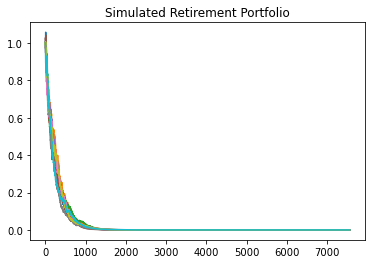

In [9]:
# Visualize the Simulation
# YOUR CODE HERE
